On connecte le travail de google colab avec google drive

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


On importe les librairies essentielles : pandas, numpy, matplotlib, seaborn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,f1_score,classification_report,ConfusionMatrixDisplay,precision_score
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

Importation du jeux de données

In [ ]:
df = pd.read_table("/content/drive/MyDrive/projet.txt",sep=";",header=0,index_col=1)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1,2,5,6,7,8,9,15,16,22) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
#On utilise la méthode info() pour afficher une description du data frame.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4646774 entries, 78643044 to 84966405
Data columns (total 22 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   ZIBZIN           object
 1   FlagImpaye       object
 2   Montant          object
 3   DateTransaction  object
 4   CodeDecision     object
 5   VerifianceCPT1   object
 6   VerifianceCPT2   object
 7   VerifianceCPT3   object
 8   D2CB             object
 9   ScoringFP1       object
 10  ScoringFP2       object
 11  ScoringFP3       object
 12  TauxImpNb_RB     object
 13  TauxImpNB_CPM    object
 14  EcartNumCheq     object
 15  NbrMagasin3J     object
 16  DiffDateTr1      object
 17  DiffDateTr2      object
 18  DiffDateTr3      object
 19  CA3TRetMtt       object
 20  CA3TR            object
 21  Heure            object
dtypes: object(22)
memory usage: 815.4+ MB


In [ ]:
# les 5 premières lignes du data frame
df.head()

,ZIBZIN,FlagImpaye,Montant,DateTransaction,CodeDecision,VerifianceCPT1,VerifianceCPT2,VerifianceCPT3,D2CB,ScoringFP1,...,TauxImpNb_RB,TauxImpNB_CPM,EcartNumCheq,NbrMagasin3J,DiffDateTr1,DiffDateTr2,DiffDateTr3,CA3TRetMtt,CA3TR,Heure
IDAvisAutorisationCheque,,,,,,,,,,,,,,,,,,,,,
78643044,A013010004908126703060931,0,20,2017-02-01 07:32:14,1,0,0,0,551,0,...,"37,186667890919111","52,076033757361408",0,1,4,4,4,20,0,27134
78643045,A013011306908024927155000,0,20,2017-02-01 07:43:37,1,0,0,0,551,0,...,"48,844716275908937","52,076033757361408",1,2,"1,7976851851851852",4,4,"28,609999999999999","8,6099999999999994",27817
78643046,A013010002908283134592527,0,"57,640000000000001",2017-02-01 07:47:38,1,0,0,0,549,0,...,"73,118279569892479","52,076033757361408",0,1,4,4,4,"57,640000000000001",0,28058
78643047,A011010002908105209831316,0,"54,289999999999999",2017-02-01 07:48:48,0,1,1,1,267,0,...,"110,05692599620494","53,554233554497365",0,1,4,4,4,"54,289999999999999",0,28128
78643048,A013010041908000125652029,0,"26,899999999999999",2017-02-01 08:13:27,1,0,0,0,549,"3,769090654336556E-3",...,"45,36831264567185","52,076033757361408",1,1,"1,9971064814814814",4,4,"59,149999999999999","32,25",29607


In [ ]:
#On supprime la variable "CodeDecision" car cette information est acquise post-transaction, et la variable "ZINBIN" qui est l'identifiant des clients
df.drop(["CodeDecision","ZIBZIN"],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4646774 entries, 78643044 to 84966405
Data columns (total 20 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   FlagImpaye       object
 1   Montant          object
 2   DateTransaction  object
 3   VerifianceCPT1   object
 4   VerifianceCPT2   object
 5   VerifianceCPT3   object
 6   D2CB             object
 7   ScoringFP1       object
 8   ScoringFP2       object
 9   ScoringFP3       object
 10  TauxImpNb_RB     object
 11  TauxImpNB_CPM    object
 12  EcartNumCheq     object
 13  NbrMagasin3J     object
 14  DiffDateTr1      object
 15  DiffDateTr2      object
 16  DiffDateTr3      object
 17  CA3TRetMtt       object
 18  CA3TR            object
 19  Heure            object
dtypes: object(20)
memory usage: 744.5+ MB


In [ ]:
#vérification des valeurs dupliquées 
df[df.index.duplicated()]

,FlagImpaye,Montant,DateTransaction,VerifianceCPT1,VerifianceCPT2,VerifianceCPT3,D2CB,ScoringFP1,ScoringFP2,ScoringFP3,TauxImpNb_RB,TauxImpNB_CPM,EcartNumCheq,NbrMagasin3J,DiffDateTr1,DiffDateTr2,DiffDateTr3,CA3TRetMtt,CA3TR,Heure
IDAvisAutorisationCheque,,,,,,,,,,,,,,,,,,,,
78664814,0,"25,390000000000001",2017-02-01 19:30:25,0,0,0,510,"5,5315904139433547E-3","0,58646732974294691","1,166901334599776E-3","55,675249045414795","36,813027373643692",0,1,4,4,4,"25,390000000000001",0,70225
78664817,0,"58,009999999999998",2017-02-01 19:30:32,0,0,0,413,"6,6885737345785765E-3","-0,69173167888417697","1,8219872881593132E-3","70,429723384709604","34,252259592896053",0,1,4,4,4,"58,009999999999998",0,70232
78664818,0,"24,559999999999999",2017-02-01 19:30:33,0,0,0,546,"8,9963369963369962E-3","2,8622465859683803","1,5498098210256701E-3","47,816637028255286","52,076033757361408",0,1,4,4,4,"24,559999999999999",0,70233
78664822,0,"53,57",2017-02-01 19:30:41,0,0,0,105,"5,1019047619047617E-2","-27,880075229168298","1,2589855169774362E-2","12,450914663346422","65,309842041312265",0,1,4,4,4,"53,57",0,70241
78664823,0,"70,969999999999999",2017-02-01 19:30:43,1,2,2,84,"4,9698879551820729E-2","1,3468037082115201","9,3115059486648354E-3","40,514356174035584","36,813027373643692",0,1,4,4,4,"70,969999999999999",0,70243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80598962,0,"35,020000000000003",2017-05-04 11:36:51,0,0,0,541,"1,0788662969808996E-2","-24,477325403032999","2,2161165663992033E-3","45,816733067729082","17,579748130154062",0,1,4,4,4,"35,020000000000003",0,41811
80598963,0,"60,5",2017-05-04 11:36:57,0,0,0,213,"2,3669796557120502E-2","-6,1806151164392791","4,3754125734385297E-3","15,874954206862865","20,614954577218729",0,1,4,4,4,"60,5",0,41817
80598966,0,"65,5",2017-05-04 11:37:02,0,0,0,1,"2,7291666666666665","-16,6619748402873","0,81728546182636908","24,865591397849464","58,064757813768217",0,1,5,5,5,"65,5",0,41822


In [ ]:
#suppression des lignes dupliquées 
#Renvoie du DataFrame avec les lignes en double supprimées.
df.drop_duplicates()


,FlagImpaye,Montant,DateTransaction,VerifianceCPT1,VerifianceCPT2,VerifianceCPT3,D2CB,ScoringFP1,ScoringFP2,ScoringFP3,TauxImpNb_RB,TauxImpNB_CPM,EcartNumCheq,NbrMagasin3J,DiffDateTr1,DiffDateTr2,DiffDateTr3,CA3TRetMtt,CA3TR,Heure
IDAvisAutorisationCheque,,,,,,,,,,,,,,,,,,,,
78643044,0,20,2017-02-01 07:32:14,0,0,0,551,0,0,0,"37,186667890919111","52,076033757361408",0,1,4,4,4,20,0,27134
78643045,0,20,2017-02-01 07:43:37,0,0,0,551,0,0,0,"48,844716275908937","52,076033757361408",1,2,"1,7976851851851852",4,4,"28,609999999999999","8,6099999999999994",27817
78643046,0,"57,640000000000001",2017-02-01 07:47:38,0,0,0,549,0,0,0,"73,118279569892479","52,076033757361408",0,1,4,4,4,"57,640000000000001",0,28058
78643047,0,"54,289999999999999",2017-02-01 07:48:48,1,1,1,267,0,0,0,"110,05692599620494","53,554233554497365",0,1,4,4,4,"54,289999999999999",0,28128
78643048,0,"26,899999999999999",2017-02-01 08:13:27,0,0,0,549,"3,769090654336556E-3","8,5863334286662614","1,1922637097134124E-3","45,36831264567185","52,076033757361408",1,1,"1,9971064814814814",4,4,"59,149999999999999","32,25",29607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84966399,0,"23,940000000000001",2017-11-30 21:20:15,0,0,0,1,"4,7880000000000003","-22,542614148742999","1,970346446840449","42,0726306465899","43,030421158372938",0,1,5,5,5,"23,940000000000001",0,76815
84966400,0,"92,599999999999994",2017-11-30 21:22:49,0,0,0,514,"6,0051880674448763E-2","-2,23637929805039","3,0838387755620319E-3","167,13091922005572","36,813027373643692",1,2,"1,035949074074074",4,4,"262,44999999999999","169,84999999999999",76969
84966401,0,69,2017-11-30 21:24:37,0,0,0,1,"3,6315789473684212","-1,0629536638928399","0,79097052273709056","72,60726072607261","52,076033757361408",0,1,5,5,5,69,0,77077


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4646774 entries, 78643044 to 84966405
Data columns (total 20 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   FlagImpaye       object
 1   Montant          object
 2   DateTransaction  object
 3   VerifianceCPT1   object
 4   VerifianceCPT2   object
 5   VerifianceCPT3   object
 6   D2CB             object
 7   ScoringFP1       object
 8   ScoringFP2       object
 9   ScoringFP3       object
 10  TauxImpNb_RB     object
 11  TauxImpNB_CPM    object
 12  EcartNumCheq     object
 13  NbrMagasin3J     object
 14  DiffDateTr1      object
 15  DiffDateTr2      object
 16  DiffDateTr3      object
 17  CA3TRetMtt       object
 18  CA3TR            object
 19  Heure            object
dtypes: object(20)
memory usage: 744.5+ MB


In [ ]:
# on analyse la variable cible:
df["FlagImpaye"].value_counts()

0             4584151
0               32627
1               29855
1                 140
FlagImpaye          1
Name: FlagImpaye, dtype: int64

In [ ]:
print(df["FlagImpaye"].unique())

[0 1 '0' '1' 'FlagImpaye']


In [ ]:
# on cherche la ligne où il y a le string:
df.loc[df["FlagImpaye"]=="FlagImpaye",:]

,FlagImpaye,Montant,DateTransaction,VerifianceCPT1,VerifianceCPT2,VerifianceCPT3,D2CB,ScoringFP1,ScoringFP2,ScoringFP3,TauxImpNb_RB,TauxImpNB_CPM,EcartNumCheq,NbrMagasin3J,DiffDateTr1,DiffDateTr2,DiffDateTr3,CA3TRetMtt,CA3TR,Heure
IDAvisAutorisationCheque,,,,,,,,,,,,,,,,,,,,
IDAvisAutorisationCheque,FlagImpaye,Montant,DateTransaction,VerifianceCPT1,VerifianceCPT2,VerifianceCPT3,D2CB,ScoringFP1,ScoringFP2,ScoringFP3,TauxImpNb_RB,TauxImpNB_CPM,EcartNumCheq,NbrMagasin3J,DiffDateTr1,DiffDateTr2,DiffDateTr3,CA3TRetMtt,CA3TR,Heure


In [ ]:
# on supprime cette ligne:
index_flag = df[df["FlagImpaye"]=="FlagImpaye"].index
df.drop(index_flag,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4646773 entries, 78643044 to 84966405
Data columns (total 20 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   FlagImpaye       object
 1   Montant          object
 2   DateTransaction  object
 3   VerifianceCPT1   object
 4   VerifianceCPT2   object
 5   VerifianceCPT3   object
 6   D2CB             object
 7   ScoringFP1       object
 8   ScoringFP2       object
 9   ScoringFP3       object
 10  TauxImpNb_RB     object
 11  TauxImpNB_CPM    object
 12  EcartNumCheq     object
 13  NbrMagasin3J     object
 14  DiffDateTr1      object
 15  DiffDateTr2      object
 16  DiffDateTr3      object
 17  CA3TRetMtt       object
 18  CA3TR            object
 19  Heure            object
dtypes: object(20)
memory usage: 744.5+ MB


In [ ]:
# on supprime le guillemets:
df["FlagImpaye"] = df["FlagImpaye"].apply(lambda x : str(x).strip('\''))
df["FlagImpaye"].value_counts()

0    4616778
1      29995
Name: FlagImpaye, dtype: int64

In [ ]:
#on vérifie les valeurs manquantes:
df.isna().sum()

FlagImpaye         0
Montant            0
DateTransaction    0
VerifianceCPT1     0
VerifianceCPT2     0
VerifianceCPT3     0
D2CB               0
ScoringFP1         0
ScoringFP2         0
ScoringFP3         0
TauxImpNb_RB       0
TauxImpNB_CPM      0
EcartNumCheq       0
NbrMagasin3J       0
DiffDateTr1        0
DiffDateTr2        0
DiffDateTr3        0
CA3TRetMtt         0
CA3TR              0
Heure              0
dtype: int64

In [ ]:
#on vérifie les valeurs manquantes:
df.isnull().sum()

FlagImpaye         0
Montant            0
DateTransaction    0
VerifianceCPT1     0
VerifianceCPT2     0
VerifianceCPT3     0
D2CB               0
ScoringFP1         0
ScoringFP2         0
ScoringFP3         0
TauxImpNb_RB       0
TauxImpNB_CPM      0
EcartNumCheq       0
NbrMagasin3J       0
DiffDateTr1        0
DiffDateTr2        0
DiffDateTr3        0
CA3TRetMtt         0
CA3TR              0
Heure              0
dtype: int64

In [ ]:
#On remplace des "," (virgule) par les "." (points) et transforme les variables en type "float".
col_replaced = ["Montant","ScoringFP1","ScoringFP2","ScoringFP3","D2CB",
                "TauxImpNb_RB","TauxImpNB_CPM","DiffDateTr1","DiffDateTr2","DiffDateTr3",
                "CA3TRetMtt","CA3TR","VerifianceCPT1","VerifianceCPT2","VerifianceCPT3",
                "EcartNumCheq","NbrMagasin3J","Heure"]
def col_convert(data,col_replaced):
  for col in col_replaced:
    data[col] = data[col].apply(lambda x: str(x).replace(",","."))
    data[col] = pd.to_numeric(data[col], errors='coerce')
    
col_convert(df,col_replaced)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4646773 entries, 78643044 to 84966405
Data columns (total 20 columns):
 #   Column           Dtype  
---  ------           -----  
 0   FlagImpaye       object 
 1   Montant          float64
 2   DateTransaction  object 
 3   VerifianceCPT1   int64  
 4   VerifianceCPT2   int64  
 5   VerifianceCPT3   int64  
 6   D2CB             int64  
 7   ScoringFP1       float64
 8   ScoringFP2       float64
 9   ScoringFP3       float64
 10  TauxImpNb_RB     float64
 11  TauxImpNB_CPM    float64
 12  EcartNumCheq     int64  
 13  NbrMagasin3J     int64  
 14  DiffDateTr1      float64
 15  DiffDateTr2      float64
 16  DiffDateTr3      float64
 17  CA3TRetMtt       float64
 18  CA3TR            float64
 19  Heure            int64  
dtypes: float64(11), int64(7), object(2)
memory usage: 744.5+ MB


In [ ]:
#Quelques statistiques élémentaires sur les données
df.describe(include="all")

,FlagImpaye,Montant,DateTransaction,VerifianceCPT1,VerifianceCPT2,VerifianceCPT3,D2CB,ScoringFP1,ScoringFP2,ScoringFP3,TauxImpNb_RB,TauxImpNB_CPM,EcartNumCheq,NbrMagasin3J,DiffDateTr1,DiffDateTr2,DiffDateTr3,CA3TRetMtt,CA3TR,Heure
count,4646773,4.646773e+06,4646773,4.646773e+06,4.646773e+06,4.646773e+06,4.646773e+06,4.646773e+06,4.646773e+06,4.646773e+06,4.646773e+06,4.646773e+06,4.646773e+06,4.646773e+06,4.646773e+06,4.646773e+06,4.646773e+06,4.646773e+06,4.646773e+06,4.646773e+06
unique,2,NaN,3097881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,0,NaN,2017-03-04 17:18:31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,4616778,NaN,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,6.014214e+01,NaN,2.295272e-01,2.452963e-01,2.716444e-01,3.139046e+02,2.217686e+00,2.033179e+00,1.373319e-01,3.912727e+01,3.850640e+01,8.480311e+03,1.036989e+00,3.873620e+00,4.166527e+00,4.199614e+00,6.730030e+01,7.158162e+00,5.248595e+04
std,NaN,1.019927e+02,NaN,4.422162e-01,4.965438e-01,5.812737e-01,2.207225e+02,2.709370e+01,9.715521e+00,4.867118e-01,6.011574e+01,1.673441e+01,1.982303e+05,1.920397e-01,1.059257e+00,5.171843e-01,4.242342e-01,1.114365e+02,3.860036e+01,1.187262e+04
min,NaN,1.000000e-02,NaN,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,-6.446148e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,3.703704e-04,7.754630e-04,1.000000e-02,0.000000e+00,1.822500e+04
25%,NaN,2.598000e+01,NaN,0.000000e+00,0.000000e+00,0.000000e+00,4.900000e+01,5.631127e-03,-1.481721e+00,1.185316e-03,2.223457e+01,2.875694e+01,0.000000e+00,1.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,2.940000e+01,0.000000e+00,4.148500e+04
50%,NaN,4.412000e+01,NaN,0.000000e+00,0.000000e+00,0.000000e+00,3.870000e+02,1.096892e-02,1.636853e-01,1.728123e-03,3.433578e+01,3.681303e+01,0.000000e+00,1.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.941000e+01,0.000000e+00,5.347800e+04
75%,NaN,7.304000e+01,NaN,0.000000e+00,0.000000e+00,0.000000e+00,5.320000e+02,4.344551e-02,7.354217e+00,5.157858e-03,4.658322e+01,5.088256e+01,0.000000e+00,1.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,8.282000e+01,0.000000e+00,6.287700e+04


In [ ]:
cible=df['FlagImpaye'].value_counts()
print(cible)

0    4616778
1      29995
Name: FlagImpaye, dtype: int64


Text(0.5, 1.0, 'Répartition de acception et refus de la transaction ')

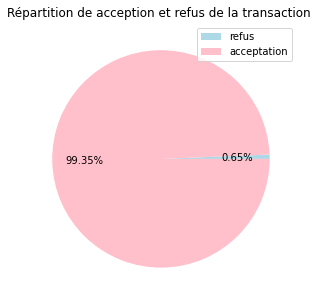

In [ ]:
plt.figure(figsize = (5, 5))
x = [cible[1], cible[0]]
plt.pie(x,colors=['lightblue','pink'],autopct = lambda x: str(round(x, 2)) + '%',
           pctdistance = 0.7, labeldistance = 1.4)
plt.legend(['refus','acceptation'])
plt.title('Répartition de acception et refus de la transaction ')

**On remarque bien qu'il y a un déséquilibre entre les deux classes . la variable cible a plus d'observations dans la classe d'acceptation .**

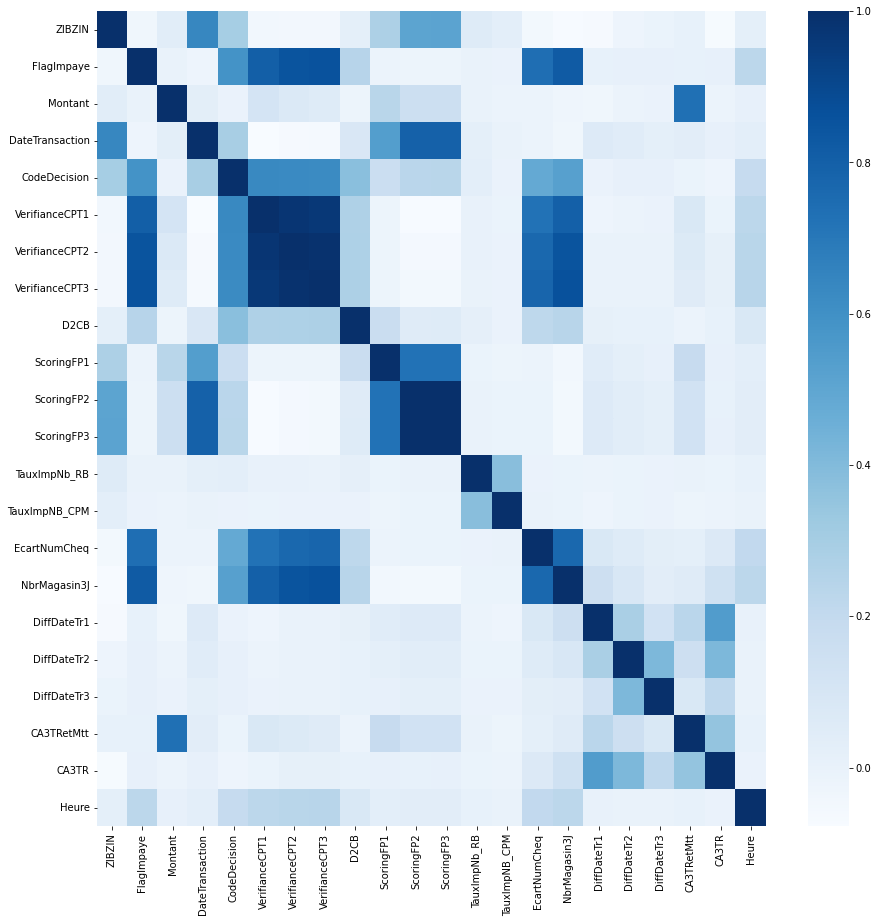

In [ ]:
#On analyse la corrélation entre les variables
data_cor = df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
fig,ax=plt.subplots(figsize=(15,15))
sns.heatmap(data_cor,cmap='Blues')

In [ ]:
#On cherche les variables les plus corrélées négativement avec la variable cible "FlagImpaye"
print(data_cor["FlagImpaye"].sort_values().head())

ZIBZIN            -0.034451
DateTransaction   -0.020173
ScoringFP3        -0.017768
ScoringFP2        -0.017694
ScoringFP1        -0.014061
Name: FlagImpaye, dtype: float64


In [ ]:
#On cherche les 10 variables les plus corrélées positivement avec la variable cible "FlagImpaye"
print(data_cor["FlagImpaye"].sort_values(ascending=False).head(11))

FlagImpaye         1.000000
VerifianceCPT2     0.050759
VerifianceCPT3     0.050461
VerifianceCPT1     0.040609
CA3TRetMtt         0.038933
CA3TR              0.034997
DiffDateTr2        0.028144
Montant            0.026332
DiffDateTr3        0.023687
DateTransaction    0.018943
DiffDateTr1        0.018550
Name: FlagImpaye, dtype: float64


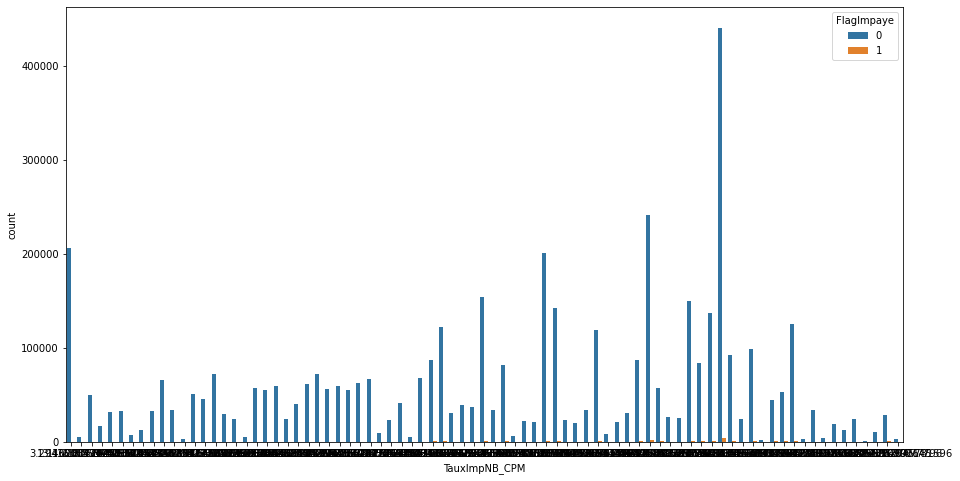

In [ ]:
#graphique sur la variable corrélée négativement avec la variable "FlagImpaye" en fonction de cette dernière.
plt.figure(figsize=(15,8))
sns.countplot(data=df,x="TauxImpNB_CPM",hue="FlagImpaye")

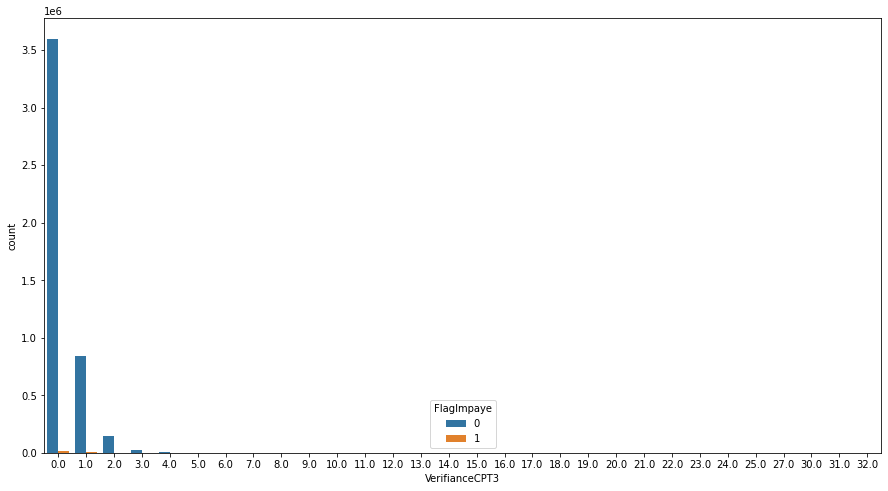

In [ ]:
#graphique sur la variable "VerifianceCPT3" et la variable "FlagImpaye" en fonction de cette dernière.
plt.figure(figsize=(15,8))
sns.countplot(data=df,x="VerifianceCPT3",hue="FlagImpaye")

In [ ]:
#on extrait la date:
import re

def extract(date):
  match = re.search(r"(.+)\ ",date)
  if match:
    return match.group()
df["Date"] = df["DateTransaction"].apply(lambda date: extract(date))

In [ ]:
df["Date"]

IDAvisAutorisationCheque
78643044    2017-02-01 
78643045    2017-02-01 
78643046    2017-02-01 
78643047    2017-02-01 
78643048    2017-02-01 
               ...     
84966399    2017-11-30 
84966400    2017-11-30 
84966401    2017-11-30 
84966402    2017-11-30 
84966405    2017-11-30 
Name: Date, Length: 4646773, dtype: object

In [ ]:
#Apprentissage : transactions ayant eu lieu entre le "2017-02-01" et le "2017-08-31".
train = df.loc[df["Date"]<="2017-08-31 ",:]
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3899362 entries, 78643044 to 83140470
Data columns (total 21 columns):
 #   Column           Dtype  
---  ------           -----  
 0   FlagImpaye       object 
 1   Montant          float64
 2   DateTransaction  object 
 3   VerifianceCPT1   int64  
 4   VerifianceCPT2   int64  
 5   VerifianceCPT3   int64  
 6   D2CB             int64  
 7   ScoringFP1       float64
 8   ScoringFP2       float64
 9   ScoringFP3       float64
 10  TauxImpNb_RB     float64
 11  TauxImpNB_CPM    float64
 12  EcartNumCheq     int64  
 13  NbrMagasin3J     int64  
 14  DiffDateTr1      float64
 15  DiffDateTr2      float64
 16  DiffDateTr3      float64
 17  CA3TRetMtt       float64
 18  CA3TR            float64
 19  Heure            int64  
 20  Date             object 
dtypes: float64(11), int64(7), object(3)
memory usage: 654.5+ MB


In [ ]:
#Test : transactions ayant eu lieu entre le "2017-09-01" et le "2017-11-30"
test = df.loc[df["Date"]>="2017-09-01 ",:]
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 747411 entries, 83140472 to 84966405
Data columns (total 21 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   FlagImpaye       747411 non-null  object 
 1   Montant          747411 non-null  float64
 2   DateTransaction  747411 non-null  object 
 3   VerifianceCPT1   747411 non-null  int64  
 4   VerifianceCPT2   747411 non-null  int64  
 5   VerifianceCPT3   747411 non-null  int64  
 6   D2CB             747411 non-null  int64  
 7   ScoringFP1       747411 non-null  float64
 8   ScoringFP2       747411 non-null  float64
 9   ScoringFP3       747411 non-null  float64
 10  TauxImpNb_RB     747411 non-null  float64
 11  TauxImpNB_CPM    747411 non-null  float64
 12  EcartNumCheq     747411 non-null  int64  
 13  NbrMagasin3J     747411 non-null  int64  
 14  DiffDateTr1      747411 non-null  float64
 15  DiffDateTr2      747411 non-null  float64
 16  DiffDateTr3      747411 non-null  

In [ ]:
# exporter train et test
train.to_csv("train_cleaned.csv",header=True,index=True)
test.to_csv("test_cleaned.csv",header=True,index=True)

In [ ]:
# importer train et test:
train = pd.read_table("/content/drive/MyDrive/projet fouille données massives/train_cleaned.csv",sep=",",header=0,index_col=0)
test = pd.read_table("/content/drive/MyDrive/projet fouille données massives/test_cleaned.csv",sep=",",header=0,index_col=0)


In [ ]:
# on supprime 2 variables "DateTransaction" et "Date"
train.drop(["DateTransaction","Date"],axis=1,inplace=True)
test.drop(["DateTransaction","Date"],axis=1,inplace=True)

In [ ]:
#vérification train:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3899362 entries, 78643044 to 83140470
Data columns (total 21 columns):
 #   Column           Dtype  
---  ------           -----  
 0   FlagImpaye       object 
 1   Montant          float64
 2   DateTransaction  object 
 3   VerifianceCPT1   int64  
 4   VerifianceCPT2   int64  
 5   VerifianceCPT3   int64  
 6   D2CB             int64  
 7   ScoringFP1       float64
 8   ScoringFP2       float64
 9   ScoringFP3       float64
 10  TauxImpNb_RB     float64
 11  TauxImpNB_CPM    float64
 12  EcartNumCheq     int64  
 13  NbrMagasin3J     int64  
 14  DiffDateTr1      float64
 15  DiffDateTr2      float64
 16  DiffDateTr3      float64
 17  CA3TRetMtt       float64
 18  CA3TR            float64
 19  Heure            int64  
 20  Date             object 
dtypes: float64(11), int64(7), object(3)
memory usage: 654.5+ MB


In [ ]:
#On crée un objet X avec les variables explicatives, et un objet y avec la variable à expliquer
X_train = train.loc[:,~train.columns.isin(['FlagImpaye'])]
y_train = train["FlagImpaye"]
X_test = test.loc[:,~train.columns.isin(['FlagImpaye'])]
y_test = test["FlagImpaye"]

In [ ]:
#vérification X_train
X_train

,Montant,VerifianceCPT1,VerifianceCPT2,VerifianceCPT3,D2CB,ScoringFP1,ScoringFP2,ScoringFP3,TauxImpNb_RB,TauxImpNB_CPM,EcartNumCheq,NbrMagasin3J,DiffDateTr1,DiffDateTr2,DiffDateTr3,CA3TRetMtt,CA3TR,Heure
IDAvisAutorisationCheque,,,,,,,,,,,,,,,,,,
78643044,20.00,0,0,0,551,0.000000,0.000000,0.000000,37.186668,52.076034,0,1,4.000000,4.0,4.0,20.00,0.00,27134
78643045,20.00,0,0,0,551,0.000000,0.000000,0.000000,48.844716,52.076034,1,2,1.797685,4.0,4.0,28.61,8.61,27817
78643046,57.64,0,0,0,549,0.000000,0.000000,0.000000,73.118280,52.076034,0,1,4.000000,4.0,4.0,57.64,0.00,28058
78643047,54.29,1,1,1,267,0.000000,0.000000,0.000000,110.056926,53.554234,0,1,4.000000,4.0,4.0,54.29,0.00,28128
78643048,26.90,0,0,0,549,0.003769,8.586333,0.001192,45.368313,52.076034,1,1,1.997106,4.0,4.0,59.15,32.25,29607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83140462,31.90,0,0,0,472,0.067585,-1.672552,0.027160,61.233704,52.076034,0,1,4.000000,4.0,4.0,31.90,0.00,77436
83140463,54.25,0,0,0,529,0.012819,9.273693,0.001193,45.368313,52.076034,0,1,4.000000,4.0,4.0,54.25,0.00,77747
83140466,18.09,0,0,0,278,0.016268,-12.708584,0.005863,84.951456,52.076034,0,1,4.000000,4.0,4.0,18.09,0.00,78312


In [ ]:
# on vérifie X_test:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 747411 entries, 83140472 to 84966405
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Montant          747411 non-null  float64
 1   DateTransaction  747411 non-null  object 
 2   VerifianceCPT1   747411 non-null  int64  
 3   VerifianceCPT2   747411 non-null  int64  
 4   VerifianceCPT3   747411 non-null  int64  
 5   D2CB             747411 non-null  int64  
 6   ScoringFP1       747411 non-null  float64
 7   ScoringFP2       747411 non-null  float64
 8   ScoringFP3       747411 non-null  float64
 9   TauxImpNb_RB     747411 non-null  float64
 10  TauxImpNB_CPM    747411 non-null  float64
 11  EcartNumCheq     747411 non-null  int64  
 12  NbrMagasin3J     747411 non-null  int64  
 13  DiffDateTr1      747411 non-null  float64
 14  DiffDateTr2      747411 non-null  float64
 15  DiffDateTr3      747411 non-null  float64
 16  CA3TRetMtt       747411 non-null  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#SMOTE

In [ ]:
# Vérification de l'inégalité de distribution dans l'ensemble train
y_train.value_counts(normalize=True)

0    0.993993
1    0.006007
Name: FlagImpaye, dtype: float64

In [ ]:
# Vérification de l'inégalité de distribution dans l'ensemble test
y_test.value_counts(normalize=True)

0    0.991206
1    0.008794
Name: FlagImpaye, dtype: float64

In [ ]:
pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Définition de l'instance SMOTE
sm = SMOTE(random_state=42,k_neighbors=3, sampling_strategy=0.5)
# Application du SMOTE aux données du train
X_smote_train, y_smote_train = sm.fit_resample(X_train, y_train)

In [ ]:
# Application du SMOTE aux données du test
X_smote_test, y_smote_test = sm.fit_resample(X_test, y_test)                  

In [ ]:
#vérification de la distribution dans train 
y_smote_train.value_counts(normalize=True)  


0    0.666667
1    0.333333
Name: FlagImpaye, dtype: float64

In [ ]:
#vérification de la distribution dans test
y_smote_test.value_counts(normalize=True)

0    0.666667
1    0.333333
Name: FlagImpaye, dtype: float64

In [ ]:
# on concaténate X_smote_train et y_smote_train dans un seul dataframe pour l'utiliser après en H2O.
smote_train = X_smote_train.copy()
smote_train["FlagImpaye"]=pd.DataFrame(y_smote_train)
smote_train    

,Montant,VerifianceCPT1,VerifianceCPT2,VerifianceCPT3,D2CB,ScoringFP1,ScoringFP2,ScoringFP3,TauxImpNb_RB,TauxImpNB_CPM,EcartNumCheq,NbrMagasin3J,DiffDateTr1,DiffDateTr2,DiffDateTr3,CA3TRetMtt,CA3TR,Heure,FlagImpaye
0,20.000000,0,0,0,551,0.000000,0.000000,0.000000,37.186668,52.076034,0,1,4.000000,4.000000,4.000000,20.000000,0.000000,27134,0
1,20.000000,0,0,0,551,0.000000,0.000000,0.000000,48.844716,52.076034,1,2,1.797685,4.000000,4.000000,28.610000,8.610000,27817,0
2,57.640000,0,0,0,549,0.000000,0.000000,0.000000,73.118280,52.076034,0,1,4.000000,4.000000,4.000000,57.640000,0.000000,28058,0
3,54.290000,1,1,1,267,0.000000,0.000000,0.000000,110.056926,53.554234,0,1,4.000000,4.000000,4.000000,54.290000,0.000000,28128,0
4,26.900000,0,0,0,549,0.003769,8.586333,0.001192,45.368313,52.076034,1,1,1.997106,4.000000,4.000000,59.150000,32.250000,29607,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5813905,19.363286,0,0,0,12,1.553158,-16.802202,0.292501,32.456820,41.936527,0,1,4.145004,4.145004,4.145004,19.363286,0.000000,48177,1
5813906,84.809512,0,0,0,426,0.011828,-8.159658,0.002504,47.379035,57.472301,0,1,4.000000,4.000000,4.000000,84.809512,0.000000,37902,1
5813907,216.142689,1,1,1,5,21.692233,-5.337305,0.386672,58.287422,38.215611,5,1,0.511908,2.599737,2.606245,622.778903,406.636214,58103,1
5813908,24.947597,0,0,0,534,0.006550,3.528656,0.001131,44.351367,56.659379,0,1,4.000000,4.000000,4.000000,24.947597,0.000000,56789,1


In [ ]:
# on concaténate X_smote_test et y_smote_test dans un seul dataframe pour l'utiliser après en H2O.
smote_test = X_smote_test.copy()
smote_test["FlagImpaye"]=pd.DataFrame(y_smote_test)
smote_test

,Montant,VerifianceCPT1,VerifianceCPT2,VerifianceCPT3,D2CB,ScoringFP1,ScoringFP2,ScoringFP3,TauxImpNb_RB,TauxImpNB_CPM,EcartNumCheq,NbrMagasin3J,DiffDateTr1,DiffDateTr2,DiffDateTr3,CA3TRetMtt,CA3TR,Heure,FlagImpaye
0,60.000000,0,0,0,302,0.000000,0.000000,0.000000,45.368313,52.076034,0,1,4.000000,4.000000,4.000000,60.000000,0.000000,27257,0
1,25.000000,0,0,0,547,0.000000,0.000000,0.000000,73.118280,52.076034,0,1,4.000000,4.000000,4.000000,25.000000,0.000000,29177,0
2,32.000000,0,0,0,152,0.000000,0.000000,0.000000,45.368313,52.076034,0,1,4.000000,4.000000,4.000000,32.000000,0.000000,29283,0
3,20.880000,0,0,0,393,0.007590,0.182221,0.002092,45.142680,34.118277,4,1,0.573461,0.998206,1.539155,92.390000,71.510000,29343,0
4,20.210000,0,0,0,152,0.018994,-1.024399,0.005682,45.368313,52.076034,0,1,4.000000,4.000000,4.000000,20.210000,0.000000,29497,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111252,77.474043,0,0,0,1,3.982513,2.321250,0.750512,38.813006,40.928001,0,1,5.000000,5.000000,5.000000,77.474043,0.000000,47816,1
1111253,52.318827,0,0,0,3,9.002831,-11.200917,0.799302,57.119934,52.926228,1,1,3.628721,4.575155,4.575155,59.532688,7.213861,44854,1
1111254,36.499960,0,0,0,320,0.012044,-1.844586,0.002633,17.633185,33.865477,0,1,4.000000,4.000000,4.000000,36.499960,0.000000,43462,1
1111255,28.818512,0,0,0,124,0.028727,-8.112943,0.008063,42.959829,49.695694,1,1,1.523513,4.000000,4.000000,40.064410,11.245899,44292,1


In [ ]:
# exporter smote_train et smote_test
smote_train.to_csv("smote_train.csv",header=True,index=True)
smote_test.to_csv("smote_test.csv",header=True,index=True)

In [ ]:
# importer smote_train et smote_test:
smote_train = pd.read_table("/content/drive/MyDrive/projet fouille données massives/smote_train.csv",sep=",",header=0,index_col=0)
smote_test = pd.read_table("/content/drive/MyDrive/projet fouille données massives/smote_test.csv",sep=",",header=0,index_col=0)

# **RandomUnderSampler**

In [ ]:
# Définition de l'instance RUS
RUS= RandomUnderSampler(random_state=42,sampling_strategy=0.5)
# Application du RES aux données du train
X_res_train, y_res_train = sm.fit_resample(X_train, y_train)

In [ ]:
# Application du RES aux données du test
X_res_test, y_res_test = sm.fit_resample(X_test, y_test)

In [ ]:
#vérification de la distribution dans train 
y_res_train.value_counts(normalize=True)

0    0.666667
1    0.333333
Name: FlagImpaye, dtype: float64

In [ ]:
#vérification de la distribution dans test
y_smote_test .value_counts(normalize=True)

0    0.666667
1    0.333333
Name: FlagImpaye, dtype: float64

On remarque bien quu'en utilisant soit une méthode d’over-sampling ( SMOTE) soit une méthode under-sampling on obtient la meme répartition de la variable cible .


# Modèle SVM

In [ ]:
svm_gaussien = make_pipeline(StandardScaler(), svm.SVC(gamma='auto'))
svm_gaussien.fit(X_smote_train, y_smote_train)

In [ ]:
pred_gaussien = svm_gaussien.predict(X_smote_test)
ctest_gaussien = confusion_matrix(y_smote_test, pred_gaussien)
ftest_gaussien = classification_report(y_smote_test, pred_gaussien)

In [ ]:
print(ftest_gaussien)

On a essayé à lancer svm, mais après 4h, on n'a obtenu aucun résultat. Comme ça prend trop de temps, on n'a pas pu aller jusqu'au bout. On peut dire que cette méthode n'est pas adaptée pour les données massives.

#Modèle random forest 

In [ ]:
# Create RandomForest classifier object
clf = RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
#apprentissage 
clf.fit(X_smote_train, y_smote_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [ ]:
#prediction
y_pred = clf.predict(X_smote_test)
y_pred

array(['0', '0', '0', ..., '0', '1', '0'], dtype=object)

In [ ]:
#les principales métriques de classification
print(metrics.classification_report(y_smote_test,y_pred))  

              precision    recall  f1-score   support

           0       0.74      0.96      0.83    740838
           1       0.80      0.32      0.45    370419

    accuracy                           0.75   1111257
   macro avg       0.77      0.64      0.64   1111257
weighted avg       0.76      0.75      0.71   1111257



In [ ]:
print(metrics.accuracy_score(y_smote_test,y_pred))

0.7457761795876201


In [ ]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [ ]:
CV_clf = GridSearchCV(estimator=clf, param_grid=param_grid)
CV_clf.fit(X_smote_train, y_smote_train) 

In [ ]:
CV_clf.best_params_ 
 

In [ ]:
clf1=RandomForestClassifier(random_state=0, max_features='auto', n_estimators= 200, max_depth=8, criterion='gini')      

In [ ]:
clf1.fit(X_smote_train, y_smote_train)

In [ ]:
pred=clf1.predict(X_smote_test)

In [ ]:
print(accuracy_score(y_smote_test,pred))

#Importation package H2O

In [ ]:
!pip install h2o
#importation de la librairie H2O
import h2o
#initialisation
h2o.init(nthreads=4)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,25 mins 01 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.4
H2O_cluster_version_age:,6 days
H2O_cluster_name:,H2O_from_python_unknownUser_0pj14z
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.385 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
#transformer train et test en H20Frame:
train_h2o = h2o.H2OFrame(smote_train)
test_h2o = h2o.H2OFrame(smote_test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
#on transforme la colonne "FlagImpaye" en type factor:
train_h2o["FlagImpaye"] = train_h2o["FlagImpaye"].asfactor()
test_h2o["FlagImpaye"] = test_h2o["FlagImpaye"].asfactor()

#Modèle random forest sous H20

In [ ]:
from h2o.estimators import H2ORandomForestEstimator

In [ ]:
param_grid_forest = { 
    'max_depth' : [8,12,16],
    'ntrees':[50,100,200]
}

In [ ]:
#classe pour la grille de recherche
from h2o.grid.grid_search import H2OGridSearch

In [ ]:
#instancier
rfGrid = H2OGridSearch(model = H2ORandomForestEstimator, hyper_params = param_grid_forest)

In [ ]:
#lancer les calculs
rfGrid.train(x=train_h2o.columns[:-1],y="FlagImpaye",training_frame=train_h2o,seed=100)

#affichage des résultats
rfModels = rfGrid.get_grid(sort_by='f1',decreasing=True) 
print(rfModels.summary())

drf Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


Model Id,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
Grid_DRF_py_1_sid_a541_model_python_1673334118551_246_model_9,200.0,200.0,20785678.0000000,16.0,16.0,16.0,4905.0,10801.0,8272.485
Grid_DRF_py_1_sid_a541_model_python_1673334118551_246_model_6,100.0,100.0,10252684.0000000,16.0,16.0,16.0,6002.0,10733.0,8161.09
Grid_DRF_py_1_sid_a541_model_python_1673334118551_246_model_3,50.0,50.0,5140777.0,16.0,16.0,16.0,6002.0,10733.0,8183.8
Grid_DRF_py_1_sid_a541_model_python_1673334118551_246_model_5,100.0,100.0,2055322.0,12.0,12.0,12.0,1262.0,1962.0,1632.79
Grid_DRF_py_1_sid_a541_model_python_1673334118551_246_model_8,200.0,200.0,4130113.0,12.0,12.0,12.0,1121.0,2098.0,1640.52
Grid_DRF_py_1_sid_a541_model_python_1673334118551_246_model_2,50.0,50.0,1023344.0,12.0,12.0,12.0,1262.0,1962.0,1625.8
Grid_DRF_py_1_sid_a541_model_python_1673334118551_246_model_7,200.0,200.0,517906.0,8.0,8.0,8.0,149.0,238.0,201.705
Grid_DRF_py_1_sid_a541_model_python_1673334118551_246_model_1,50.0,50.0,129308.0,8.0,8.0,8.0,170.0,238.0,201.5
Grid_DRF_py_1_sid_a541_model_python_1673334118551_246_model_4,100.0,100.0,260205.0,8.0,8.0,8.0,163.0,238.0,202.75


None


In [ ]:
#paramètres du premier (meilleur) modèle
rfModels.get_hyperparams(0)

Hyperparameters: [max_depth, ntrees]


[16, 200]

In [ ]:
#récupération du meilleur modele
rfBest = rfModels[0]

In [ ]:
#prédiction sur le test
predrfBest = rfBest.predict(test_h2o).as_data_frame()

#f1 score:
ftest_rfbest = f1_score(test_h2o.as_data_frame()["FlagImpaye"],predrfBest.predict)
print(ftest_rfbest)

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
0.714943530752485


In [ ]:
#matrice confusion:
cm_rfbest = confusion_matrix(test_h2o.as_data_frame()["FlagImpaye"],predrfBest.predict)
print(cm_rfbest)

[[583528 157310]
 [ 76816 293603]]


Modèle Random Forest : f1-score = 0.715, taux d'erreur classe posivtive = 0.207

#Modèle NN sous H2O: Perceptron multicouche

In [ ]:
from h2o.estimators import H2ODeepLearningEstimator

In [ ]:
#fonction d'activation "tanh"
pmc_tanh = H2ODeepLearningEstimator(seed=100,standardize=True,
                              activation='tanh')
#apprentissage
pmc_tanh.train(x=train_h2o.columns[:-1],y="FlagImpaye",training_frame=train_h2o)

#prediction
predPmc_tanh = pmc_tanh.predict(test_h2o).as_data_frame()

#f1_score:
ftest_pmc_tanh = f1_score(test_h2o.as_data_frame()["FlagImpaye"],predPmc_tanh.predict)
print(ftest_pmc_tanh)


deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%
0.5674103687382657


In [ ]:
pmc_tanh.show()

Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_model_python_1671524854887_68


Status of Neuron Layers: predicting FlagImpaye, 2-class classification, bernoulli distribution, CrossEntropy loss, 44,402 weights/biases, 531.1 KB, 78,717 training samples, mini-batch size 1
    layer    units    type     dropout    l1    l2    mean_rate             rate_rms               momentum    mean_weight             weight_rms           mean_bias                bias_rms
--  -------  -------  -------  ---------  ----  ----  --------------------  ---------------------  ----------  ----------------------  -------------------  -----------------------  --------------------
    1        18       Input    0.0
    2        200      Tanh     0.0        0.0   0.0   0.00963111175170828   0.01378249004483223    0.0         0.0003627575503671526   0.08954712748527527  0.0004313258304417501    0.017779581248760223
    3        200      Tanh     0.0        0.0   0.0   0.13156783681384404   0.2440640926361084     0.0         6.938235291960382e-06   0.06966665387153625  0.0010356890750499374    0.038137152791023254
    4        2        Softmax             0.0   0.0   0.004240529126836918  0.0012083817273378372  0.0         -5.748984200181439e-05  0.35412001609802246  -1.9921308985065833e-07  0.0588301420211792

ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.23386458225058954
RMSE: 0.4835954737697506
LogLoss: 0.7907774966965532
Mean Per-Class Error: 0.3509998771111189
AUC: 0.6860059264096564
AUCPR: 0.5662665214234712
Gini: 0.3720118528193128

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.09781549636841437
       0     1     Error    Rate
-----  ----  ----  -------  ----------------
0      4555  2141  0.3197   (2141.0/6696.0)
1      1284  2075  0.3823   (1284.0/3359.0)
Total  5839  4216  0.3406   (3425.0/10055.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.0978155    0.547855  302
max f2                       0.00489659   0.715421  395
max f0point5                 0.212874     0.555853  224
max accuracy                 0.272642     0.720139  197
max precision                0.999501     1         0
max recall                   0.00101631   1         399
max specificity              0.999501     1         0
max absolute_mcc             0.157914     0.315213  255
max min_per_class_accuracy   0.0894291    0.642921  310
max mean_per_class_accuracy  0.114213     0.652149  287
max tns                      0.999501     6696      0
max fns                      0.999501     3322      0
max fps                      0.00101631   6696      399
max tps                      0.00101631   3359      399
max tnr                      0.999501     1         0
max fnr                      0.999501     0.988985  0
max fpr                      0.00101631   1         399
max tpr                      0.00101631   1         399

Gains/Lift Table: Avg response rate: 33.41 %, avg score: 14.82 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100448                   0.991381           2.54888   2.54888            0.851485         0.997397    0.851485                    0.997397            0.0256029       0.0256029                  154.888   154.888            0.0233627
2        0.0200895                   0.916606           2.43033   2.4896             0.811881         0.959599    

In [ ]:
#fonction d'activation "rectifier"
pmc_rectifier = H2ODeepLearningEstimator(seed=100,standardize=True,
                              activation='rectifier')
#apprentissage
pmc_rectifier.train(x=train_h2o.columns[:-1],y="FlagImpaye",training_frame=train_h2o)

#prediction 
predPmc_rectifier = pmc_rectifier.predict(test_h2o).as_data_frame()

#f1_score:
ftest_pmc_rectifier = f1_score(test_h2o.as_data_frame()["FlagImpaye"],predPmc_rectifier.predict)
print(ftest_pmc_rectifier)

deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%
0.6143015002252574


In [ ]:
pmc_rectifier.show()

Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_model_python_1671524854887_80


Status of Neuron Layers: predicting FlagImpaye, 2-class classification, bernoulli distribution, CrossEntropy loss, 44,402 weights/biases, 531.1 KB, 1,093,724 training samples, mini-batch size 1
    layer    units    type       dropout    l1    l2    mean_rate             rate_rms              momentum    mean_weight             weight_rms           mean_bias              bias_rms
--  -------  -------  ---------  ---------  ----  ----  --------------------  --------------------  ----------  ----------------------  -------------------  ---------------------  -------------------
    1        18       Input      0.0
    2        200      Rectifier  0.0        0.0   0.0   0.013539486483754849  0.016880273818969727  0.0         0.041417340035905       0.17918235063552856  0.07263688538298112    0.08973821997642517
    3        200      Rectifier  0.0        0.0   0.0   0.23983905740612974   0.2730778455734253    0.0         -0.04270096163003441    0.08332926034927368  0.7016567980944477     0.19131094217300415
    4        2        Softmax               0.0   0.0   0.009194577859743732  0.005965651944279671  0.0         -0.0001683350461826194  0.30858349800109863  0.0004390309701113593  0.28548669815063477

ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.26841273235210744
RMSE: 0.5180856419088522
LogLoss: 1.0275094071951492
Mean Per-Class Error: 0.28455124928729786
AUC: 0.7889384134636418
AUCPR: 0.7069462609295157
Gini: 0.5778768269272836

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.02361085889975688
       0     1     Error    Rate
-----  ----  ----  -------  ----------------
0      5104  1592  0.2378   (1592.0/6696.0)
1      1113  2246  0.3313   (1113.0/3359.0)
Total  6217  3838  0.269    (2705.0/10055.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.0236109    0.624149  339
max f2                       0.0086257    0.741351  378
max f0point5                 0.0636737    0.663322  284
max accuracy                 0.0423429    0.766882  309
max precision                0.995595     1         0
max recall                   9.67973e-05  1         399
max specificity              0.995595     1         0
max absolute_mcc             0.0423429    0.445888  309
max min_per_class_accuracy   0.02062      0.708483  345
max mean_per_class_accuracy  0.0236109    0.715449  339
max tns                      0.995595     6696      0
max fns                      0.995595     3357      0
max fps                      9.67973e-05  6696      399
max tps                      9.67973e-05  3359      399
max tnr                      0.995595     1         0
max fnr                      0.995595     0.999405  0
max fpr                      9.67973e-05  1         399
max tpr                      9.67973e-05  1         399

Gains/Lift Table: Avg response rate: 33.41 %, avg score:  5.67 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100448                   0.775247           2.99345   2.99345            1                0.895243    1                           0.895243            0.0300685       0.0300685                  199.345   199.345            0.0300685
2        0.0200895                   0.580819           2.93417   2.96381            0.980198         0.673056    0

In [ ]:
#fonction d'activation "maxout"
pmc_maxout = H2ODeepLearningEstimator(seed=100,standardize=True,
                              activation='maxout')
#apprentissage
pmc_maxout.train(x=train_h2o.columns[:-1],y="FlagImpaye",training_frame=train_h2o)

#prediction 
predPmc_maxout = pmc_maxout.predict(test_h2o).as_data_frame()

#f1_score:
ftest_pmc_maxout = f1_score(test_h2o.as_data_frame()["FlagImpaye"],predPmc_maxout.predict)
print(ftest_pmc_maxout)

deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%
0.6139595684275161


In [ ]:
pmc_maxout.show()

Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_model_python_1671524854887_111


Status of Neuron Layers: predicting FlagImpaye, 2-class classification, bernoulli distribution, CrossEntropy loss, 88,402 weights/biases, 1.0 MB, 164,748 training samples, mini-batch size 1
    layer    units    type     dropout    l1    l2    mean_rate             rate_rms               momentum    mean_weight              weight_rms           mean_bias                bias_rms
--  -------  -------  -------  ---------  ----  ----  --------------------  ---------------------  ----------  -----------------------  -------------------  -----------------------  -------------------
    1        18       Input    0.0
    2        200      Maxout   0.0        0.0   0.0   0.023386003585694398  0.03863444924354553    0.0         0.026354502506930354     0.10957351326942444  0.24418664639346155      0.07433652877807617
    3        200      Maxout   0.0        0.0   0.0   0.2775054556752875    0.2002779245376587     0.0         -0.014722795145857913    0.0735115110874176   0.9036950033051839       0.06016850471496582
    4        2        Softmax             0.0   0.0   0.001544994004216278  0.0008605800103396177  0.0         -0.00013512937209270604  0.2702986001968384   -0.00017418242575724038  0.04973548650741577

ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.15667011331613562
RMSE: 0.3958157567810251
LogLoss: 0.4790350764152374
Mean Per-Class Error: 0.25711910760264245
AUC: 0.8217099970015824
AUCPR: 0.7269519914093614
Gini: 0.6434199940031649

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4141376350539082
       0     1     Error    Rate
-----  ----  ----  -------  ----------------
0      5280  1416  0.2115   (1416.0/6696.0)
1      1017  2342  0.3028   (1017.0/3359.0)
Total  6297  3758  0.242    (2433.0/10055.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.414138     0.658142  202
max f2                       0.205562     0.76304   301
max f0point5                 0.615088     0.684835  124
max accuracy                 0.573297     0.779115  140
max precision                0.987254     0.96875   4
max recall                   0.0211329    1         391
max specificity              0.999442     0.999552  0
max absolute_mcc             0.434394     0.478129  194
max min_per_class_accuracy   0.3739       0.73865   218
max mean_per_class_accuracy  0.414138     0.742881  202
max tns                      0.999442     6693      0
max fns                      0.999442     3295      0
max fps                      0.00427564   6696      399
max tps                      0.0211329    3359      391
max tnr                      0.999442     0.999552  0
max fnr                      0.999442     0.980947  0
max fpr                      0.00427564   1         399
max tpr                      0.0211329    1         391

Gains/Lift Table: Avg response rate: 33.41 %, avg score: 37.79 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100448                   0.995235           2.90454    2.90454            0.970297         0.998501   0.970297                    0.998501            0.0291753       0.0291753                  190.454   190.454            0.0287273
2        0.0200895                   0.977627           2.84526    2.8749             0.950495         0.986879

On peut voir que la fonction d'activation "maxout" est la meilleur (f1_score est meilleur et le taux d'erreur dans la classe positive est moins élevé).
En suite, on va chercher à optimiser les hyperparamètres avec H2OGridSearch.

In [ ]:
#H2OGridSearch
from h2o.grid.grid_search import H2OGridSearch

In [ ]:
#définir les paramètres à tester :
mcParametres = {'epochs':[30,50,100],
                'hidden':[[300],[400],[500]]
                }

In [ ]:
#instancier
mcGrid = H2OGridSearch(model = pmc_maxout, hyper_params = mcParametres)

In [ ]:
#lancer les calculs 
mcGrid.train(x=train_h2o.columns[:-1],y="FlagImpaye",training_frame=train_h2o,seed=100)
#affichage des résultats
mcModels = mcGrid.get_grid(sort_by='f1',decreasing=True) 
print(mcModels.summary())

deeplearning Grid Build progress: |██████████████████████████████████████████████| (done) 100%


Model Id,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
Grid_DeepLearning_py_1_sid_9a21_model_python_1671524854887_977_model_4,1,18,Input,0.0,,,,,,,,,
Grid_DeepLearning_py_1_sid_9a21_model_python_1671524854887_977_model_1,1,18,Input,0.0,,,,,,,,,
Grid_DeepLearning_py_1_sid_9a21_model_python_1671524854887_977_model_2,1,18,Input,0.0,,,,,,,,,
Grid_DeepLearning_py_1_sid_9a21_model_python_1671524854887_977_model_7,1,18,Input,0.0,,,,,,,,,
Grid_DeepLearning_py_1_sid_9a21_model_python_1671524854887_977_model_5,1,18,Input,0.0,,,,,,,,,
Grid_DeepLearning_py_1_sid_9a21_model_python_1671524854887_977_model_3,1,18,Input,0.0,,,,,,,,,
Grid_DeepLearning_py_1_sid_9a21_model_python_1671524854887_977_model_8,1,18,Input,0.0,,,,,,,,,
Grid_DeepLearning_py_1_sid_9a21_model_python_1671524854887_977_model_6,1,18,Input,0.0,,,,,,,,,
Grid_DeepLearning_py_1_sid_9a21_model_python_1671524854887_977_model_9,1,18,Input,0.0,,,,,,,,,


None


On a essayé à tester H2OGridSearch avec la validation croisée, mais ça prend trop de temps, après 8h ça ne donne aucun résultat et la session était expirée en même temps. C'est pour cette raison qu'on n'utilise pas de paramètre nfold ici.

In [ ]:
#paramètres du premier (meilleur) modèle
mcModels.get_hyperparams(0)

Hyperparameters: [epochs, hidden]


[30.0, 400]

In [ ]:
#récupération du meilleur modele
mcBest = mcModels[0]
print(mcBest)

Model Details
H2ODeepLearningEstimator : Deep Learning
Model Key: Grid_DeepLearning_py_1_sid_9a21_model_python_1671524854887_977_model_4


Status of Neuron Layers: predicting FlagImpaye, 2-class classification, bernoulli distribution, CrossEntropy loss, 16,002 weights/biases, 202.4 KB, 193,363 training samples, mini-batch size 1
    layer    units    type     dropout    l1    l2    mean_rate              rate_rms               momentum    mean_weight            weight_rms           mean_bias                bias_rms
--  -------  -------  -------  ---------  ----  ----  ---------------------  ---------------------  ----------  ---------------------  -------------------  -----------------------  -------------------
    1        18       Input    0.0
    2        400      Maxout   0.0        0.0   0.0   0.12521691956769548    0.21407043933868408    0.0         0.012978262839805181   0.08333858847618103  0.33151137823942506      0.2020784616470337
    3        2        Softmax             0

In [ ]:
#prédiction sur le test
predmcBest = mcBest.predict(test_h2o).as_data_frame()

#f1 score:
ftest_mcbest = f1_score(test_h2o.as_data_frame()["FlagImpaye"],predmcBest.predict)
print(ftest_mcbest)

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%
0.6173857784882273


In [ ]:
#matrice confusion:
cm_mcbest = confusion_matrix(test_h2o.as_data_frame()["FlagImpaye"],predmcBest.predict)
print(cm_mcbest)

[[478122 262716]
 [ 87702 282717]]


 Modèle NN paramètres (epochs, hidden)=(30,400) : f1-score= 0.617

#H2OAutoML

In [ ]:
#chargement de la classe
from h2o.automl import H2OAutoML
#instanciation
aml = H2OAutoML(seed=100,max_models = 3,max_runtime_secs = 500)
#lancement des calculs
aml.train(x=train_h2o.columns[:-1],y="FlagImpaye",training_frame=train_h2o)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_1_AutoML_1_20221220_110941


Model Summary: 
    number_of_trees
--  -----------------
    15

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.03963124237431536
RMSE: 0.19907597136348565
LogLoss: 0.15920499940990107
Mean Per-Class Error: 0.043556487056987975
AUC: 0.9925754738186234
AUCPR: 0.9870855984876102
Gini: 0.9851509476372469

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.38580964769768067
       0            1            Error    Rate
-----  -----------  -----------  -------  --------------------
0      2.63514e+06  78072        0.0288   (78072.0/2713210.0)
1      79087        1.27658e+06  0.0583   (79087.0/1355664.0)
Total  2.71422e+06  1.35465e+06  0.0386   (157159.0/4068874.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value        idx
---------------------------  -----------  -----------  -----
max f1                       0.38581      0.942014     212
max f2                       0.284003     0.953088     244
max f0point5                 0.529779     0.956836     169
max accuracy                 0.397661     0.961414     208
max precision                0.995445     1            0
max recall                   0.00792453   1            397
max specificity              0.995445     1            0
max absolute_mcc             0.38581      0.913058     212
max min_per_class_accuracy   0.335938     0.957408     227
max mean_per_class_accuracy  0.335938     0.957593     227
max tns                      0.995445     2.71321e+06  0
max fns                      0.995445     1.34428e+06  0
max fps                      0.00509284   2.71321e+06  399
max tps                      0.00792453   1.35566e+06  397
max tnr                      0.995445     1            0
max fnr                      0.995445     0.991603     0
max fpr                      0.00509284   1            399
max tpr                      0.00792453   1            397

Gains/Lift Table: Avg response rate: 33.32 %, avg score: 33.46 %
group    cumulative_data_fraction    lower_threshold    lift         cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  -----------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100001                   0.992964           3.00139      3.00139            1                0.99423     1                           0.99423             0.0300141       0.0300141                  200.139   200.139            0.0300141
2        0.020005                    0.991118           3.00139      3.00139            1                0.992014    1                           0.993122            0.0300288       0.0600429                  200.139   200.139            0.0600429
3        0.0300002                   0.989356           3.00139      3.00139            1                0.990275    1                           0.992174            0.0299993       0.0900422                  200.139   200.139            0.0900422
4        0.0400027                   0.987367           3.00139      3.00139            1                0.988352    1                           0.991218            0.0300215       0.120064                   200.139   200.139            0.120064
5        0.0500003                   0.985095           3.00131      3.00137            0.999975         0.986276    0.999995                    0.99023             0.030006        0.15007                    200.131   200.137            0.150069
6        0.1                         0.963659           3.00081      3.00109            0.999808         0.97596     0.999902                    0.983

In [ ]:
#récupérer le tableau des modèles
lb = aml.leaderboard
#nombre de modèles
print(lb.nrow)
#afficher les modèles -- tri par défaut AUC pour le classement binaire
result = lb.head(rows=lb.nrow).as_data_frame() 

1


In [ ]:
#meilleur modèle
aml.leader

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_1_AutoML_1_20221220_110941


Model Summary: 
    number_of_trees
--  -----------------
    15

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.03963124237431536
RMSE: 0.19907597136348565
LogLoss: 0.15920499940990107
Mean Per-Class Error: 0.043556487056987975
AUC: 0.9925754738186234
AUCPR: 0.9870855984876102
Gini: 0.9851509476372469

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.38580964769768067
       0            1            Error    Rate
-----  -----------  -----------  -------  --------------------
0      2.63514e+06  78072        0.0288   (78072.0/2713210.0)
1      79087        1.27658e+06  0.0583   (79087.0/1355664.0)
Total  2.71422e+06  1.35465e+06  0.0386   (157159.0/4068874.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value        idx
---------------------------  -----------  -----------  -----
max f1                       0.38581      0.942014     212
max f2                       0.284003     0.953088     244
max f0point5                 0.529779     0.956836     169
max accuracy                 0.397661     0.961414     208
max precision                0.995445     1            0
max recall                   0.00792453   1            397
max specificity              0.995445     1            0
max absolute_mcc             0.38581      0.913058     212
max min_per_class_accuracy   0.335938     0.957408     227
max mean_per_class_accuracy  0.335938     0.957593     227
max tns                      0.995445     2.71321e+06  0
max fns                      0.995445     1.34428e+06  0
max fps                      0.00509284   2.71321e+06  399
max tps                      0.00792453   1.35566e+06  397
max tnr                      0.995445     1            0
max fnr                      0.995445     0.991603     0
max fpr                      0.00509284   1            399
max tpr                      0.00792453   1            397

Gains/Lift Table: Avg response rate: 33.32 %, avg score: 33.46 %
group    cumulative_data_fraction    lower_threshold    lift         cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  -----------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100001                   0.992964           3.00139      3.00139            1                0.99423     1                           0.99423             0.0300141       0.0300141                  200.139   200.139            0.0300141
2        0.020005                    0.991118           3.00139      3.00139            1                0.992014    1                           0.993122            0.0300288       0.0600429                  200.139   200.139            0.0600429
3        0.0300002                   0.989356           3.00139      3.00139            1                0.990275    1                           0.992174            0.0299993       0.0900422                  200.139   200.139            0.0900422
4        0.0400027                   0.987367           3.00139      3.00139            1                0.988352    1                           0.991218            0.0300215       0.120064                   200.139   200.139            0.120064
5        0.0500003                   0.985095           3.00131      3.00137            0.999975         0.986276    0.999995                    0.99023             0.030006        0.15007                    200.131   200.137            0.150069
6        0.1                         0.963659           3.00081      3.00109            0.999808         0.97596     0.999902                    0.983

In [ ]:
#prediction
predAml = aml.predict(test_h2o).as_data_frame()

#f1_score:
ftest_predAml = f1_score(test_h2o.as_data_frame()["FlagImpaye"],predAml.predict)
print(ftest_predAml)

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%
0.8505801131214168


In [ ]:
#matrice confusion:
cm_xml = confusion_matrix(test_h2o.as_data_frame()["FlagImpaye"],predAml.predict)
print(cm_xml)

[[663566  77272]
 [ 39124 331295]]


le taux d'erreur sur la classe positive = 0.106

In [ ]:
#Enregistrer le modèle 
model_NN_auto = h2o.download_model(aml.leader, path="/content/drive/MyDrive/projet fouille données massives")

Le meilleur modèle est XgBoost: f1_score = 0.85, le taux d'erreur sur la classe positive = 0.106.



#H2OXGBoostEstimator

In [ ]:
#XGboost
from h2o.estimators import H2OXGBoostEstimator

In [ ]:
#définir les paramètres à tester
xgParametres = {'ntrees':[30,50] , 'max_depth':[5,10]}
#classe pour la grille de recherche
from h2o.grid.grid_search import H2OGridSearch
#instancier
xgGrid = H2OGridSearch(model = H2OXGBoostEstimator, hyper_params = xgParametres)

In [ ]:
#lancer les calculs 
xgGrid.train(x=train_h2o.columns[:-1],y="FlagImpaye",training_frame=train_h2o,seed=100)
#affichage des résultats
xgModels = xgGrid.get_grid(sort_by='f1',decreasing=True) 
print(xgModels.summary())

xgboost Grid Build progress: |███████████████████████████████████████████████████| (done) 100%


Model Id,number_of_trees
Grid_XGBoost_py_1_sid_9a21_model_python_1671524854887_1127_model_4,50.0
Grid_XGBoost_py_1_sid_9a21_model_python_1671524854887_1127_model_2,30.0
Grid_XGBoost_py_1_sid_9a21_model_python_1671524854887_1127_model_3,50.0
Grid_XGBoost_py_1_sid_9a21_model_python_1671524854887_1127_model_1,30.0


None


In [ ]:
#paramètres du meilleur modèle
xgModels.get_hyperparams(0)

Hyperparameters: [ntrees, max_depth]


[50, 10]

In [ ]:
#récupération du meilleur modele
xgBest = xgModels[0]
print(xgBest)

Model Details
H2OXGBoostEstimator : XGBoost
Model Key: Grid_XGBoost_py_1_sid_9a21_model_python_1671524854887_1127_model_4


Model Summary: 
    number_of_trees
--  -----------------
    50

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.04493166851844544
RMSE: 0.2119709143218603
LogLoss: 0.16283959300687914
Mean Per-Class Error: 0.061998508748845445
AUC: 0.9860466802991666
AUCPR: 0.9771738980543689
Gini: 0.9720933605983333

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.38495857027252756
       0            1            Error    Rate
-----  -----------  -----------  -------  --------------------
0      3.7311e+06   144837       0.0374   (144837.0/3875940.0)
1      167884       1.77009e+06  0.0866   (167884.0/1937970.0)
Total  3.89899e+06  1.91492e+06  0.0538   (312721.0/5813910.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value        idx
---------------------------  -----------  -----------  

In [ ]:
#prédiction sur le test
predxgBest = xgBest.predict(test_h2o).as_data_frame()

#f1 score:
ftest_xgbest = f1_score(test_h2o.as_data_frame()["FlagImpaye"],predxgBest.predict)
print(ftest_xgbest)

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%
0.845973395153723


In [ ]:
#matrice confusion:
cm_xgbest = confusion_matrix(test_h2o.as_data_frame()["FlagImpaye"],predxgBest.predict)
print(cm_xgbest)

[[651292  89546]
 [ 33236 337183]]


Modèle XgBoost paramètres (ntrees, max_depth)=(50,10): f1-score = 0.846, le taux d'erreur sur la classe positive = 0.089

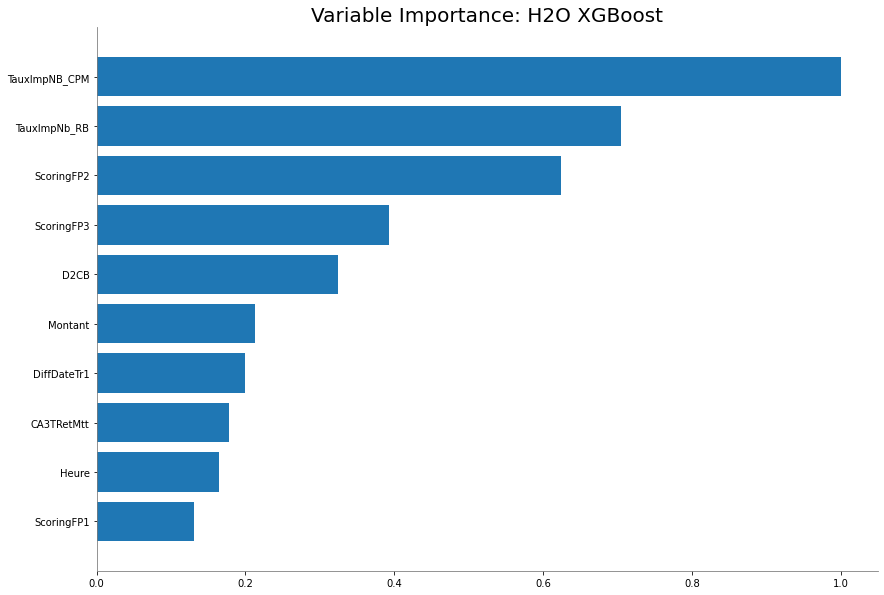

<Figure size 432x288 with 0 Axes>

In [ ]:
#plotting var importance
xgBest.varimp_plot()

In [ ]:
#sélection variable:
features_xg = ["TauxImpNB_CPM","TauxImpNb_RB","ScoringFP2","ScoringFP3","D2CB","Montant","DiffDateTr1","CA3TRetMtt","Heure","ScoringFP1"]
  

In [ ]:
#on récupère les meilleurs paramètres + sélection variables:
pmc_xg_select = H2OXGBoostEstimator(seed=100,ntrees=50,max_depth=10)
#apprentissage
pmc_xg_select.train(x=features_xg,y="FlagImpaye",training_frame=train_h2o)

#prediction 
predPmc_xg_select = pmc_xg_select.predict(test_h2o).as_data_frame()

#f1_score:
ftest_xg_select = f1_score(test_h2o.as_data_frame()["FlagImpaye"],predPmc_xg_select.predict)
print(ftest_xg_select)

xgboost Model Build progress: |██████████████████████████████████████████████████| (done) 100%
xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%
0.8890200243912034


In [ ]:
#matrice confusion:
cm_xgselect = confusion_matrix(test_h2o.as_data_frame()["FlagImpaye"],predPmc_xg_select.predict)
print(cm_xgselect)

[[701777  39061]
 [ 42748 327671]]


Modèle XgBoost paramètres (ntrees, max_depth)=(50,10) après sélection variable : f1-score = 0.889, le taux d'erreur sur la classe positive = 0.115

In [ ]:
#Enregistrer le modèle 
model_gb = h2o.download_model(xgBest, path="/content/drive/MyDrive/projet fouille données massives")

Déployment : On enregistre le modèle qi'il a le f1_score élevée et le taux d'erreur sur la classe positive moins élevé, c'est le modèle xgboost paramètres (ntrees, max_depth)=(50,10) (f1_score = 0.846, le taux d'erreur sur la classe positive = 0.089)